# **Evaluación de contenidos 1 Módulo 2**
## **Ejercicios de Pandas - Filtrado de datos y visualización**

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [66]:
df_music = pd.read_csv("../data/Spotify_Youtube_clean.csv", index_col = 0)
pd.options.display.max_columns = None

In [ ]:
df_music.info()

¿Cuáles son los valores únicos de la columna "album_type"? Cread tres dataframes diferentes, uno para cada tipo de "album_type". 

In [ ]:
df_music["album_type"].unique()

In [ ]:
df_album = df_music[df_music["album_type"] == "album"]
df_single = df_music[df_music["album_type"] == "single"]
df_compilation = df_music[df_music["album_type"] == "compilation"]

¿Cuántas canciones tenemos en cada tipo?

Se pueden ver las canciones de cada tipo desde la columna "album_type" o desde los dataframes creados. Hay 14.926 canciones de tipo album, 5004 single y 788 compilation, a través de diversos métodos. En el caso de los subsets el value_counts() no arroja los mismos resultados. 

In [ ]:
df_music["album_type"].value_counts()

Usando el dataframe de los albumes que hemos creado en el ejercicio anterior. ¿Cuál es la media y la desviación estándar de "danceability", "acousticness" y "speechiness" de cada artista?.
Mostrad los resultados en tres dataframes diferentes, uno para cada métrica ("danceability", "acousticness" y "speechiness"). Ordenar los resultados de mayor a menor en base a la media.

In [ ]:
df_dance = df_music.groupby("artist")["danceability"].agg(["mean", "std"]).reset_index().sort_values(by="mean", ascending=False)
df_dance

In [ ]:
df_acoustic = df_music.groupby("artist")["acousticness"].agg(["mean", "std"]).reset_index().sort_values(by="mean", ascending=False)
df_acoustic

In [ ]:
df_speechiness = df_music.groupby("artist")["speechiness"].agg(["mean", "std"]).reset_index().sort_values(by="mean", ascending=False)
df_speechiness

Se quiere estudiar si existe una relación entre la cantidad de visitas que reciben los videos de música de un artista en una plataforma de streaming y la cantidad de likes que estos videos obtienen. Por lo tanto, querremos contestar a la siguiente pregunta: ¿Son aquellos artistas que tienen más visitas los que más likes tienen?  Para solucionar este ejercicio deberéis:

- Agrupar por artista y calcular la media de visitas y de likes.
- Quedaros con los 10 artistas que más visitas han tenido.
- Quedaros con los 10 artistas que más likes han tenido.
- Haced un subplot, donde en uno tengamos los 10 artistas con más likes y en el otro los 10 artistas con mas views.
- BONUS Haced lo mismo para los datos de tipo "single".

In [ ]:
df_views = df_music.groupby("artist")["views"].mean().reset_index()
df_likes = df_music.groupby("artist")["likes"].mean().reset_index()
print(df_views, df_likes)

In [ ]:
ten_best_views = df_views.sort_values(by= "views", ascending = False).head(10)
ten_best_views

In [ ]:
ten_best_likes = df_likes.sort_values(by= "likes", ascending = False).head(10)
ten_best_likes

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(15,10))

sns.barplot(data = ten_best_likes, x = "artist", y = "likes", color = "green", edgecolor = "black", ax = ax[0]).set_title('Artists best "liked" by Spotify', loc = "right")
sns.barplot(data = ten_best_views, x = "artist", y = "views", color = "b", edgecolor = "black", ax = ax[1]).set_title("Artists with top views in Spotify", loc = "right")

ax[0].spines["top"].set_visible(False)  
ax[0].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)   
ax[1].spines["right"].set_visible(False)

fig.suptitle("The best artists in Spotify", fontsize = 15)   
fig.tight_layout()    

Hay tres artistas que están en los dos top ten de "views" y "likes". Aunque se pudiera pensar que debería haber correspondiencia entre las dos variables esto no lo indica tanto, aunque ciertamente son 3 de un grupo de 10. Podemos pensar en ver la correlación entre estas dos vriables, "views" y "likes" de otras maneras. 

In [ ]:
music_corr= df_music.corr()

Si nos fijamos en la tabla de correlación, en el mismo sentido que se intuye por lógica, ambas variables si están correlacionadas, a pesar de que los datos de los artistas en ambas variables no sean tan claros. De manera más gráfica podemos verlo en el heatmap que sigue. Tras las correlaciones perfectas de cada variable consigo misma, la correlación más alta es la de estas dos variables y es positiva como cabía esperar, por tanto, cuanto una aumenta, tambien lo hace la otra. 

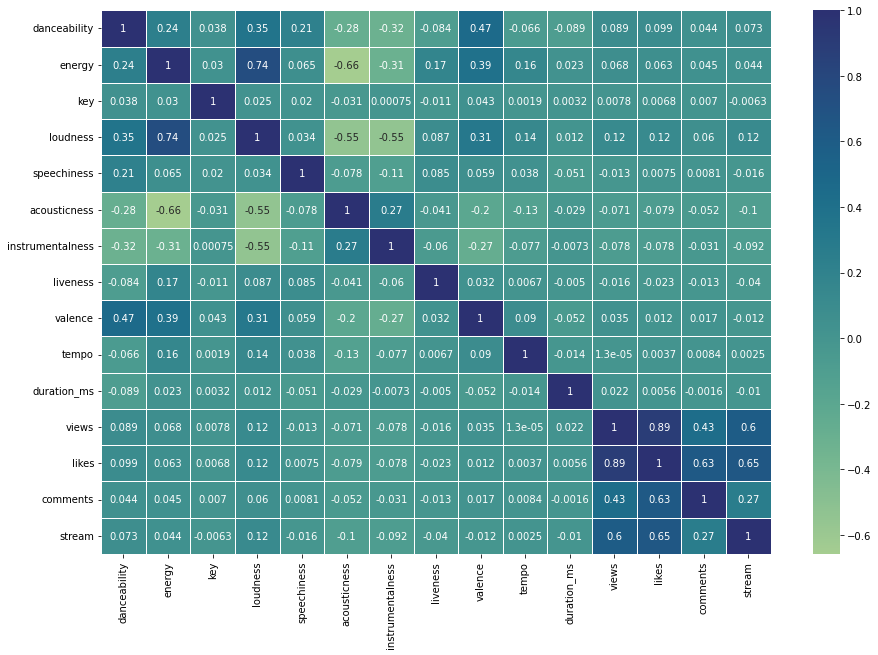

In [169]:
plt.figure(figsize = (15,10))
sns.heatmap(music_corr,
            cmap = "crest",
           annot = True,
           linewidth = .5)
plt.show()

In [ ]:
df_single_views = df_single.groupby("artist")["views"].mean().reset_index()
df_single_likes = df_single.groupby("artist")["likes"].mean().reset_index()


In [ ]:
ten_best_single_by_likes = df_single_likes.sort_values(by= "likes", ascending = False).head(10)
ten_best_single_by_likes

In [ ]:
ten_best_single_by_views = df_single_views.sort_values(by= "views", ascending = False).head(10)
ten_best_single_by_views

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(15,10))

sns.barplot(data = ten_best_single_by_likes, x = "artist", y = "likes", color = "green", edgecolor = "black", ax = ax[0]).set_title('Best artists by single likes', loc = "right")
sns.barplot(data = ten_best_single_by_views, x = "artist", y = "views", color = "b", edgecolor = "black", ax = ax[1]).set_title("Best artists by single views", loc = "right")

ax[0].spines["top"].set_visible(False)  
ax[0].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)   
ax[1].spines["right"].set_visible(False)

fig.suptitle("The best artists by single in Spotify", fontsize = 15)   
fig.tight_layout()    

**Encontramos una relación similar en el caso de los singles a la encontrada en el caso anterior.** 

Ahora queremos analizar la colaboración entre artistas en la industria musical, se tienen datos de las colaboraciones realizadas en los últimos años. Se desea conocer cuáles son los artistas que han colaborado en mayor cantidad de canciones y generar un ranking con los diez primeros. ¿Qué artistas con los que más colaboraciones tienen? Para esto tendréis que:

- Filtrad los datos para quedaros solo con aquellos datos donde en la columna "track" tengamos "feat".
- Contad cuantas canciones tiene cada artista utilizando el dataframe generado en el paso anterior.
- Mostrad los resultados en una gráfica, seleccionado los 10 artistas con más colaboraciones.

In [153]:
df_feat = df_music[df_music["track"].str.contains("feat", case = False)]

In [161]:
feats_by_artist = df_feat.groupby("artist")["track"].count().reset_index().sort_values(by = "track", ascending = False)
feats_by_artist

artist  track
62    Bibi und Tina     10
307         Juicy J     10
404      Macklemore     10
647    Ty Dolla ign      9
138       DJ Khaled      9
..              ...    ...
331           Kesha      1
330   Kenny Loggins      1
327  Kendrick Lamar      1
325   Kelly Rowland      1
701      Ñengo Flow      1

[702 rows x 2 columns]

In [157]:
#Los diez artistas con más colaboraciones. Los que más tienen diez y el top ten tiene ocho.
top_feat_artists = feats_by_artist.head(10)
top_feat_artists

artist  track
62             Bibi und Tina     10
307                  Juicy J     10
404               Macklemore     10
647             Ty Dolla ign      9
138                DJ Khaled      9
668             Wu-Tang Clan      9
47                     B.o.B      8
405  Macklemore & Ryan Lewis      8
124             Clean Bandit      8
667                   Wizkid      8

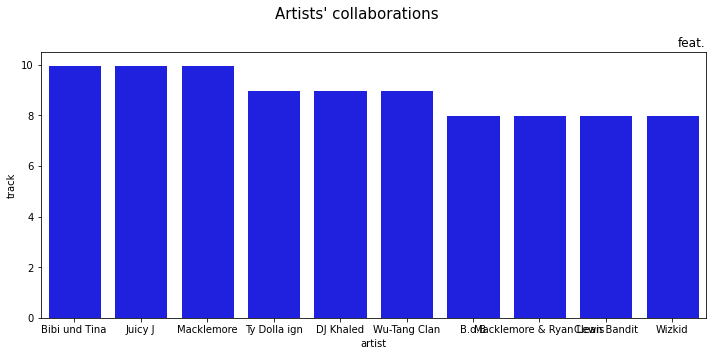

In [159]:
fig = plt.figure(figsize=(10,5))

sns.barplot(data = top_feat_artists, x = "artist", y = "track", color = "b", edgecolor = "white").set_title('feat.', loc = "right")

fig.suptitle("Artists' collaborations", fontsize = 15)   
fig.tight_layout()    


Utilizando el dataframe original, queremos explorar si el tipo de álbum influye en la cantidad de vistas que recibe en una plataforma de transmisión de música. Para ello, debemos generar un boxplot con las variables necesarias y responder las siguientes preguntas:

¿Qué tipo de álbumes tienden a tener más vistas en promedio?

¿Hay algún tipo de álbumes que tenga una mayor dispersión en las vistas recibidas?

¿Existen valores atípicos (outliers) en alguna categoría de álbumes?

¿Qué conclusión se puede obtener sobre la relación entre el tipo de álbum y la cantidad de vistas recibidas?

Antes de ver gráficas o estadísticos conviene estudiar un poco las columnas a través de operaciones sencillas.
- "album_type" - como ya vimos en la exploración no contiene nulos, contando con un total de 20.718 registros. Se divide en tres categorías que son "album", "single" y "compilation". De cara a ver su relación con cualquier otra variable es conveniente recordar como están distribuidas en la muestra. En este caso, "album" es la categoría del 72% del contenido de esta columna, "single" el 24,15% y "compilation" el 3.80%. El peso de las categorías es por tanto muy desigual en el conjunto de datos, aunque por otro lado, sí es probablemente significativo del tipo de productos que llegan a la plataforma y desde ese punto de vista, tienen sentido. 
- "views" - cuenta con 470 nulos. Es una columna de tipo numérico que contiene el número de visualizaciones de cada canción contenida en el dataset. 

In [ ]:
total_album_type = df_music["album_type"].value_counts()
total_album_type

In [ ]:
round(total_album_type*100/df_music.shape[0],2)

In [ ]:
total_album_type[0:-1]*100/df_music.shape

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))

sns.boxplot(data=df_music, x = "views", ax=ax[0])
sns.boxplot(data=df_music, x = "views", y = "album_type", ax=ax[1])
fig.suptitle("Total views and views by album type", fontsize = 20)
fig.tight_layout() 
plt.show()

In [ ]:
df_album_type = df_music.groupby("album_type")["views"].agg(["mean", "std"])
df_album_type

Se ha decidido incluir junto al boxplot de visitas por tipo de album otro de visitas totales para ver la correspondencia entre los dos, ya que la que se produce en visitas es la que cabe esperar en tipos de album. 

Podemos decir, apoyados también en una media  nada robusta que el tipo album recibe mas visitas. Nada extraordinario siendo el 74% del contenido de la plataforma, seguido muy de cerca por single y compilation. No existen grandes diferencias entre los tres tipos a pesar de su diferente presencia en los datos. 

La dispersión en el tipo album es tambien mayor, aunque en general, los estadísticos básicos sacados de estos datos no podrían considerarse, dada la cantidad de outliers, en todas las categorías,  y pronunciadamente en album, que están distorsionando los datos. 

No se pueden sacar conclusiones definitivas de estos datos en relación a las visitas y el tipo de album ya que diferentes factores están condicionando los resultados que vemos, los outliers y el diferente peso en la muestra. 

Sería necesario estudiar los outliers, o categorizar "views" y dividir la muestra de tal manera que contemos con datos homogéneos que no se distorsionen. 
Este tipo de gráficas y conjuntos de datos son habituales en este tipo de industria, música, videojuegos, libros, películaso, series, donde encontramos un gran mercado con mucha oferta pero realmente son muy pocos los contenidos que están consiguiendo la mayoría de visualizaciones, o ventas, o reviews. 